In [2]:
import cv2
import os 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense , Dropout
import numpy as np
import pyttsx3


In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Preprocessing

In [ ]:
# root => where to pick the data/folder
root = r'C:\Users\MANAN\Downloads\valid'

# dest => where to store the output data 
dest = r'E:\All codes\Python\Projects\myProj\valid'

# looping over root directory's subdirectories
for enter in os.listdir(root):
    
    # specifying the final destination
    final = os.path.join(dest,enter)
    path = os.path.join(root,enter)
    
    # making the target/final directory
    os.makedirs(final)
    
    for item in os.listdir(path):
        
        # reading image from specified source
        image = cv2.imread(os.path.join(path,item),1)
        
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray,(5,5),2)
        th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
        ret, res = cv2.threshold(th3, 70, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        #Saving the image 
        name = os.path.join(final,item)
        cv2.imwrite(name ,res)

In [35]:
# root => where to pick the data/folder
root = r'C:\Users\MANAN\Downloads\train'

# dest => where to store the output data 
dest = r'E:\All codes\Python\Projects\myProj\train'

# looping over root directory's subdirectories
for enter in os.listdir(root):
    
    # specifying the final destination
    final = os.path.join(dest,enter)
    path = os.path.join(root,enter)
    
    # making the target/final directory
#     os.makedirs(final)
    
    for item in os.listdir(path):
        
        # reading image from specified source
        image = cv2.imread(os.path.join(path,item),1)
        
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray,(5,5),2)
        th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
        ret, res = cv2.threshold(th3, 70, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        #Saving the image 
        name = os.path.join(final,item)
        cv2.imwrite(name ,res)

## Model Creation

In [5]:
sz = 128
train = r'E:\All codes\Python\Projects\myProj\train'
# test = r'E:\All codes\Python\Projects\Sign-Language-to-Text\test'
test = r'E:\All codes\Python\Projects\myProj\valid'
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))

# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))

#classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
#classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=26, activation='softmax')) # softmax for more than 2

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', 
                   metrics=['accuracy']) # categorical_crossentropy for more than 2


# Step 2 - Preparing the train/test data and training the model
classifier.summary()

# Code copied from - https://keras.io/preprocessing/image/
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train,
                                                 target_size=(sz, sz),
                                                 batch_size=10,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(test,
                                            target_size=(sz , sz),
                                            batch_size=10,
                                            color_mode='grayscale',
                                            class_mode='categorical')
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best-Model.h5",save_best_only =True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3686528   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

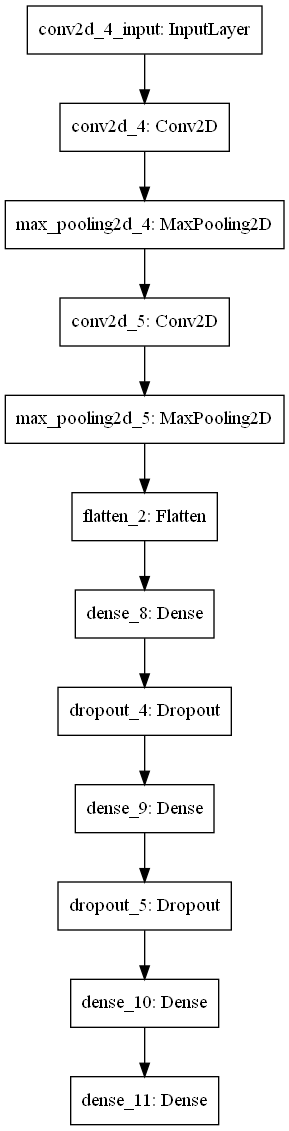

In [26]:
import pydot
import graphviz
# from keras.utils.vis_utils import plot_model
# print(pydot.__version__)
tf.keras.utils.plot_model(classifier, to_file='model_plot.png')

## Training

In [12]:
history = classifier.fit_generator(
        training_set,
        steps_per_epoch=400, # No of images in training set
        epochs=10,
        validation_data=test_set,
        validation_steps=300,
        callbacks = [checkpoint_cb])# No of images in test set

Epoch 1/3
400/400 [==============================] - 145s 362ms/step - loss: 2.9980 - accuracy: 0.1100 - val_loss: 1.6982 - val_accuracy: 0.5007
Epoch 2/3
400/400 [==============================] - 97s 244ms/step - loss: 1.6895 - accuracy: 0.4502 - val_loss: 0.7332 - val_accuracy: 0.7757
Epoch 3/3
400/400 [==============================] - 70s 171ms/step - loss: 1.1569 - accuracy: 0.6083 - val_loss: 0.3578 - val_accuracy: 0.8857


In [6]:
checkpoint_cb1 = keras.callbacks.ModelCheckpoint("New-trainmix1.h5",save_best_only =True)
history2 = classifier.fit_generator(
        training_set,
        steps_per_epoch=1200, # No of images in training set
        epochs=15,
        validation_data=test_set,
        validation_steps=90,
        callbacks = [checkpoint_cb1])# No of images in test set

e:\installed\python37-64\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
1200/1200 [==============================] - 99s 77ms/step - loss: 3.1225 - accuracy: 0.0779 - val_loss: 3.1939 - val_accuracy: 0.2044
Epoch 2/15
1200/1200 [==============================] - 80s 67ms/step - loss: 1.4941 - accuracy: 0.5231 - val_loss: 2.6743 - val_accuracy: 0.2800
Epoch 3/15
1200/1200 [==============================] - 81s 67ms/step - loss: 0.9161 - accuracy: 0.7075 - val_loss: 2.6289 - val_accuracy: 0.3589
Epoch 4/15
1200/1200 [==============================] - 89s 74ms/step - loss: 0.6900 - accuracy: 0.7808 - val_loss: 2.1446 - val_accuracy: 0.3900
Epoch 5/15
1200/1200 [==============================] - 56s 47ms/step - loss: 0.5898 - accuracy: 0.8149 - val_loss: 2.0091 - val_accuracy: 0.4667
Epoch 6/15
1200/1200 [==============================] - 42s 35ms/step - loss: 0.5237 - accuracy: 0.8342 - val_loss: 1.9316 - val_accuracy: 0.4511
Epoch 7/15
1200/1200 [==============================] - 49s 40ms/step - loss: 0.4742 - accuracy: 0.8529 - val_loss: 1.8136 -

In [42]:
keras.backend.clear_session()

In [ ]:
history = keras.models.load_model("best-model1.h5")

In [ ]:
del history

## Visualize

In [20]:
history.history.items()

dict_items([('loss', [0.6703997254371643, 0.5996863842010498]), ('accuracy', [0.7672500014305115, 0.797249972820282]), ('val_loss', [0.11285551637411118, 0.10132969915866852]), ('val_accuracy', [0.9713333249092102, 0.9753333330154419])])

In [31]:
history1.history.items()

dict_items([('loss', [1.9353598356246948, 1.0478012561798096, 0.7301468849182129, 0.5589455366134644, 0.4666663408279419, 0.4174278676509857, 0.37217411398887634, 0.3330307900905609, 0.3130228817462921, 0.2817353904247284]), ('accuracy', [0.374916672706604, 0.6506666541099548, 0.7513333559036255, 0.809166669845581, 0.8450833559036255, 0.8629166483879089, 0.8794999718666077, 0.89083331823349, 0.8977500200271606, 0.9103333353996277]), ('val_loss', [6.955021858215332, 6.268601417541504, 5.690977096557617, 5.831303596496582, 7.405486583709717, 5.926706790924072, 7.020308971405029, 6.403995513916016, 6.593021869659424, 7.638031005859375]), ('val_accuracy', [0.04769230633974075, 0.10923077166080475, 0.0938461571931839, 0.13538461923599243, 0.08461538702249527, 0.1230769231915474, 0.10923077166080475, 0.13538461923599243, 0.14769230782985687, 0.11384615302085876])])

Text(0.5, 1.0, 'Accuracy evolution')

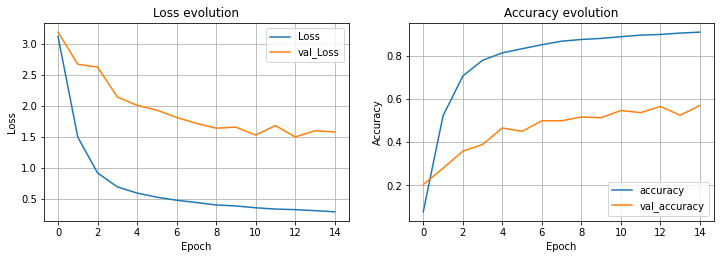

In [11]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history2.history['loss'], label='Loss')
plt.plot(history2.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy evolution')

Text(0.5, 1.0, 'Accuracy evolution')

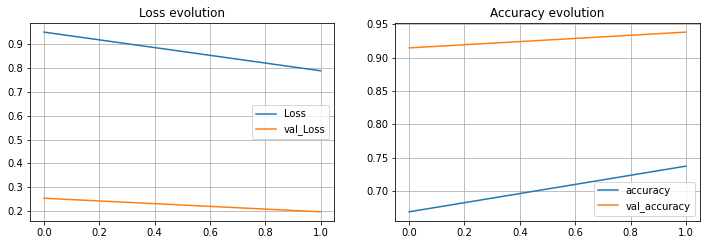

In [16]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy evolution')

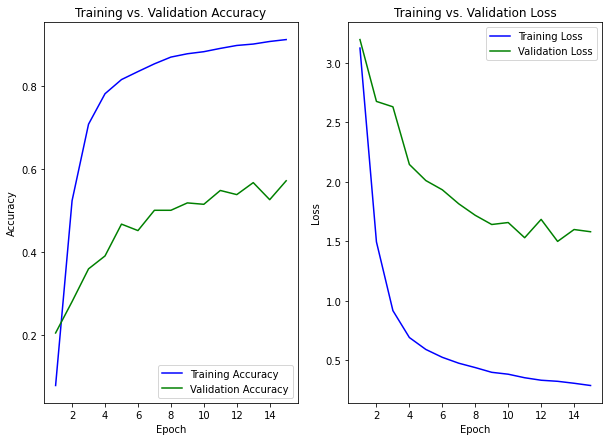

In [12]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize = (10, 7))

plt.subplot(1,2,2)
plt.plot(epochs, loss, c = 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, c = 'g', label = 'Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,1)
plt.plot(epochs, acc, c = 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, c = 'g', label = 'Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()



plt.show()

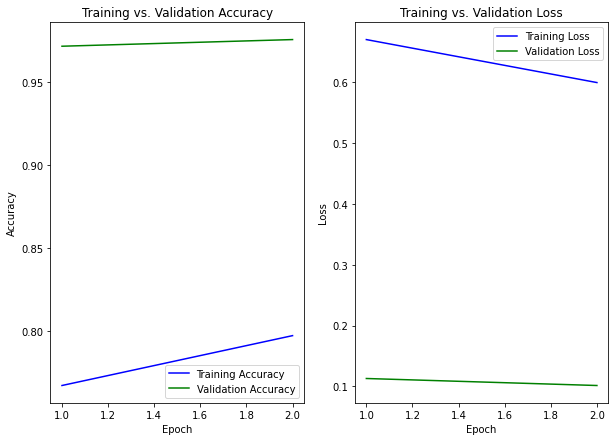

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize = (10, 7))

plt.subplot(1,2,1)
plt.plot(epochs, acc, c = 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, c = 'g', label = 'Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, c = 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, c = 'g', label = 'Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Prediction

In [2]:
import cv2
import os 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense , Dropout
import numpy as np
import pyttsx3


In [2]:
SemodelImport = keras.models.load_model("Best-Model.h5")

In [5]:
SemodelImport.shape()

AttributeError: 'Sequential' object has no attribute 'shape'

In [3]:
SemodelImport = keras.models.load_model("New-trainmix1.h5")
label = [" ","A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
engine = pyttsx3.init()
vid = cv2.VideoCapture(0)
img1 = np.zeros((500,500,3),np.uint8)
out = ''
# for i in range(1,6):
#     test = str(i) + ".jpg"
#     image = tf.keras.preprocessing.image.load_img(test,grayscale=True ,target_size = (128,128))
#     image_arr = tf.keras.preprocessing.image.img_to_array(image)
#     image_arr = np.array([image_arr])
#     pred = SemodelImport.predict_classes(image_arr)
#     print(np.array(label)[pred])
#     out = out + (str(np.array(label)[pred]))[2]
#     cv2.putText(img1,out,(100,100),cv2.FONT_HERSHEY_SIMPLEX,0.6, (255,255,255), 1)
while(vid.isOpened()):
    ret,frame = vid.read()
    cv2.rectangle(frame,(100,100),(400,400),(0,255,0),1)
    cv2.imshow("Image",frame)
    cv2.imshow("Text",img1)
    crop = frame[100:400, 100:400]
    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),2)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, 70, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    cv2.imshow("crop",res)
    k = cv2.waitKey(1)
    if k != -1:
        if k==27:
            break
        else:
            cv2.imwrite("test.jpg",res)
            for i in range(1,6):
                test = str(i) + ".jpg"
            image = tf.keras.preprocessing.image.load_img("test.jpg",grayscale=True ,target_size = (128,128))
            image_arr = tf.keras.preprocessing.image.img_to_array(image)
            image_arr = np.array([image_arr])
            pred = SemodelImport.predict_classes(image_arr)
            print(np.array(label)[pred])
            out = out + (str(np.array(label)[pred]))[2]
            cv2.putText(img1,out,(100,100),cv2.FONT_HERSHEY_SIMPLEX,0.6, (255,255,255), 1)
          
print(out)
vid.release()
cv2.destroyAllWindows() 
engine.setProperty('rate',100) #determine the rate of speech (optional)/ used for changing rate of speech
engine.say(out) #
engine.runAndWait() # the code will wait for the speech to complete

e:\installed\python37-64\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
e:\installed\python37-64\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential/conv2d/Conv2D (defined at <ipython-input-3-2c3f90197949>:38) ]] [Op:__inference_predict_function_523]

Function call stack:
predict_function


Text(0.5, 1.0, 'Accuracy evolution')

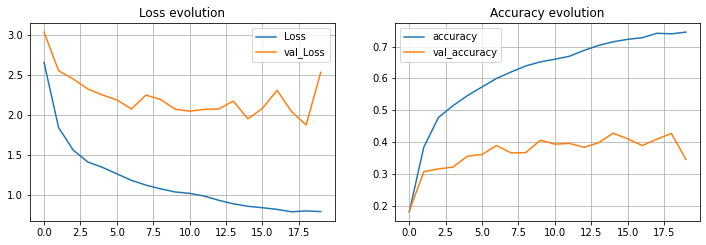

In [8]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history2.history['loss'], label='Loss')
plt.plot(history2.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy evolution')

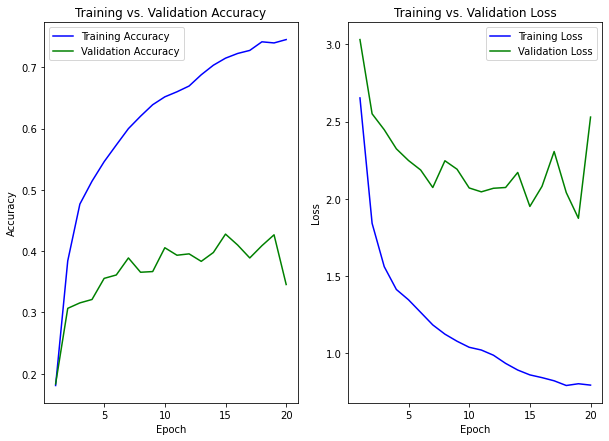

In [7]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize = (10, 7))

plt.subplot(1,2,1)
plt.plot(epochs, acc, c = 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, c = 'g', label = 'Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, c = 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, c = 'g', label = 'Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()